#**Exercício - Aula 2**

Dado o dataset de produtos [1], você deverá desenvolver diferentes modelos para classificação de textos, envolvendo cenários diferentes. O dataset utilizado será o de classificação de produtos, utilizado na aula anterior.

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

Obs.: em todos os modelos use:
- Remoção dos registros com valores faltantes
- criem uma nova coluna concatenando as colunas nome e descrição.
- randon_state igual a 42 para permitir a comparação com seus colegas e separe uma amostra de 30% para teste.
- Nas partes 1 e 2, utilize sempre o mesmo algorítmo de classificação.
- Para avaliação de resultados, sempre apresente o relatório de classificação e a matriz de confusão


### Parte 1 - Diferentes tipos de vetorização sem processos de limpeza de texto

Nesta parte você deverá aplicar apenas as seguintes técnicas:

1. Remoção de pontuação
2. Lowercasing
3. Vetorização

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões

### Parte 2 - Diferentes tipos de vetorização com um processo completo de normalização

Nesta parte você deverá fazer uma exploração do dataset e aplicar as técnicas de normalização que julgar que trarão o melhor resultado na modelagem.

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões. Em suas análises, considere também os resultados obtidos na parte 1

### Parte 3 (Extra) - Diferentes algorítmos de classificação

Nesta parte você deverá selecionar um dos datasets criados na parte 2 (justifique) e treinar 3 modelos de classificação utilizando diferentes algorítmos. Seguem algumas sugestões de algorítimos:

- Regressão Logistica (LogisticRegression)
- Random Forest (RandomForestClassifier)
- Naive Bayes (MultinomialNB e BernoulliNB)


Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões.

### Parte 4 (Extra) - word2vec

Você deverá treinar o modelo de classificação do dataset de produtos utilizando a abordagem de classificação com word2vec pela representação do vetor médio.



## **Parte 1**

In [1]:
# Pacotes utilizados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
import string


def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text


In [2]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
# carregar dataframe
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

# limpeza inicial (normalização)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )

In [4]:
# Aplicar pré-processamento aos conjuntos de treino e teste
df_train['processed_text'] = df_train['texto'].apply(preprocess_text)
df_test['processed_text'] = df_test['texto'].apply(preprocess_text)


In [5]:
# BOW
bow_model = make_pipeline(CountVectorizer(), MultinomialNB())
bow_model.fit(df_train['processed_text'], df_train['categoria'])
bow_predictions_bow = bow_model.predict(df_test['processed_text'])
accuracy_bow = accuracy_score(df_test['categoria'], bow_predictions_bow)

In [6]:

# TF
tf_model = make_pipeline(CountVectorizer(), MultinomialNB())
tf_model.fit(df_train['processed_text'], df_train['categoria'])
tf_predictions = tf_model.predict(df_test['processed_text'])
accuracy_tf = accuracy_score(df_test['categoria'], tf_predictions)

In [7]:
# TF-IDF
tfidf_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
tfidf_model.fit(df_train['processed_text'], df_train['categoria'])
tfidf_predictions = tfidf_model.predict(df_test['processed_text'])
accuracy_tfidf = accuracy_score(df_test['categoria'], tfidf_predictions)

In [8]:
# Resultados
print(f'Precisao BOW: {accuracy_bow:.4f}')
print(f'Precisao TF: {accuracy_tf:.4f}')
print(f'Precisao TF-IDF: {accuracy_tf:.4f}')

Precisao BOW: 0.9794
Precisao TF: 0.9794
Precisao TF-IDF: 0.9794


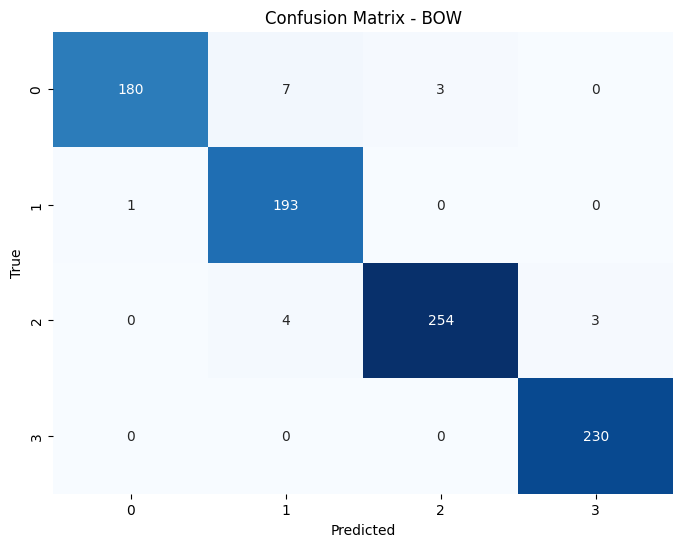

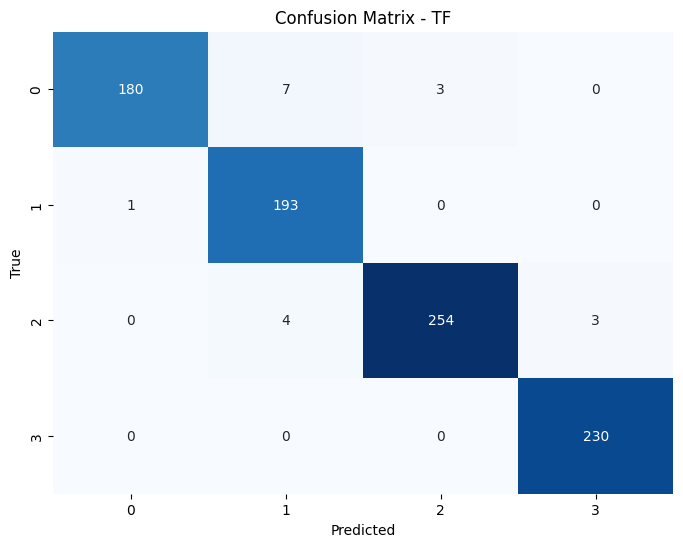

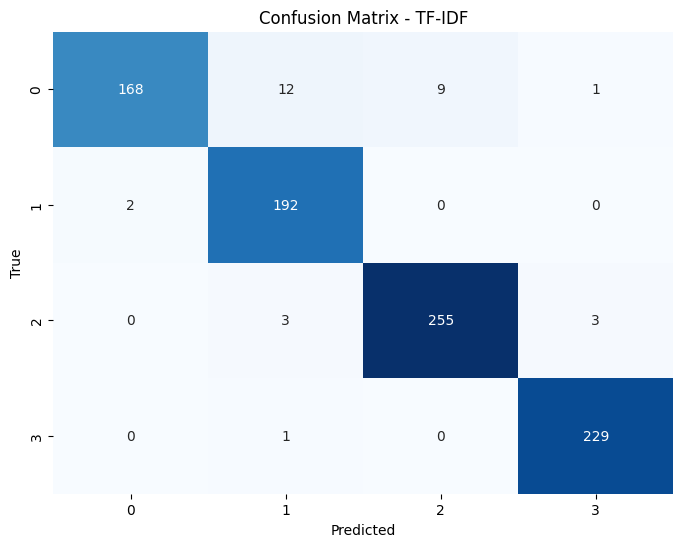

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotar matrizes de confusão
plot_confusion_matrix(df_test['categoria'], bow_predictions_bow, 'Confusion Matrix - BOW')
plot_confusion_matrix(df_test['categoria'], tf_predictions, 'Confusion Matrix - TF')
plot_confusion_matrix(df_test['categoria'], tfidf_predictions, 'Confusion Matrix - TF-IDF')

## **Parte 2**

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Baixar recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])


def preprocess_text_complete(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = lemmatize_text(text)
    return text

# Carregar o dataframe
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

# Limpeza inicial (normalização completa)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']
df['processed_text'] = df['texto'].apply(preprocess_text_complete)



In [12]:
# Divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
    df,
    test_size=0.3,
    random_state=42
)

# BOW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(df_train['processed_text'])
X_test_bow = bow_vectorizer.transform(df_test['processed_text'])
bow_model_complete = MultinomialNB()
bow_model_complete.fit(X_train_bow, df_train['categoria'])
bow_predictions_bow_complete = bow_model_complete.predict(X_test_bow)
accuracy_bow_complete = accuracy_score(df_test['categoria'], bow_predictions_bow_complete)

# TF
tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(df_train['processed_text'])
X_test_tf = tf_vectorizer.transform(df_test['processed_text'])
tf_model_complete = MultinomialNB()
tf_model_complete.fit(X_train_tf, df_train['categoria'])
tf_predictions_complete = tf_model_complete.predict(X_test_tf)
accuracy_tf_complete = accuracy_score(df_test['categoria'], tf_predictions_complete)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['processed_text'])
tfidf_model_complete = MultinomialNB()
tfidf_model_complete.fit(X_train_tfidf, df_train['categoria'])
tfidf_predictions_complete = tfidf_model_complete.predict(X_test_tfidf)
accuracy_tfidf_complete = accuracy_score(df_test['categoria'], tfidf_predictions_complete)



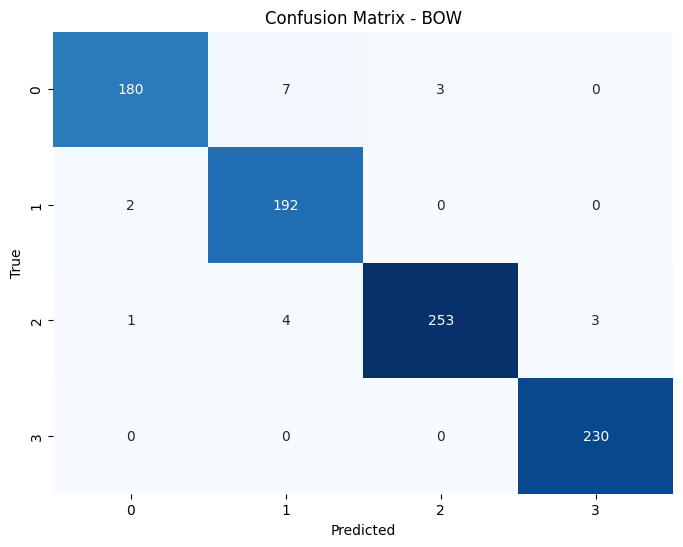

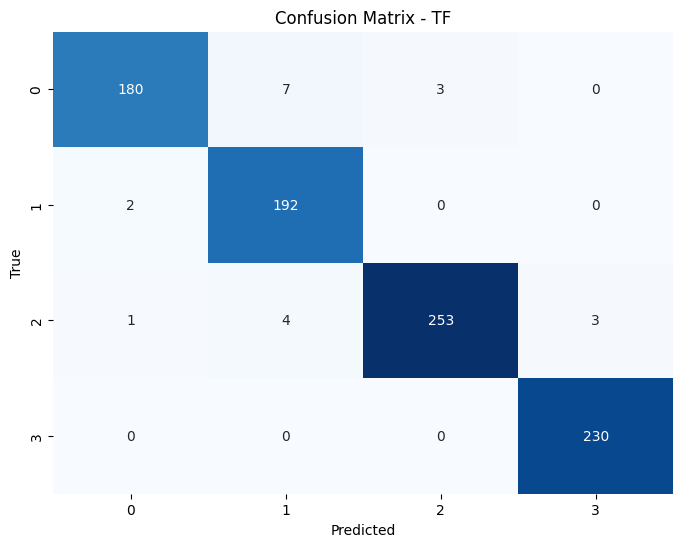

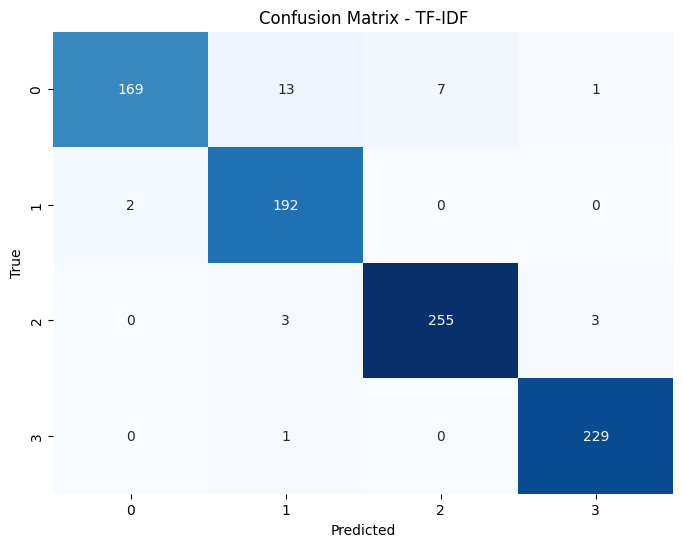

In [13]:

# Plotar matrizes de confusão
plot_confusion_matrix(df_test['categoria'], bow_predictions_bow_complete, 'Confusion Matrix - BOW')
plot_confusion_matrix(df_test['categoria'], tf_predictions_complete, 'Confusion Matrix - TF')
plot_confusion_matrix(df_test['categoria'], tfidf_predictions_complete, 'Confusion Matrix - TF-IDF')

In [14]:
# Resultados
print(f'Precisao BOW (completo): {accuracy_bow_complete:.4f}')
print(f'Precisao TF (completo): {accuracy_tf_complete:.4f}')
print(f'Precisao TF-IDF (completo): {accuracy_tfidf_complete:.4f}')


Precisao BOW (completo): 0.9771
Precisao TF (completo): 0.9771
Precisao TF-IDF (completo): 0.9657


## **Parte 3 (Extra)**

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataframe
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

# Limpeza inicial (normalização completa)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# Escolher o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['texto'])
y = df['categoria']

# Divisão da amostra entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)



In [16]:
# Treinar modelos
# Modelo 1: Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_predictions)

# Modelo 2: Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, random_forest_predictions)

# Modelo 3: Naive Bayes (Multinomial)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, naive_bayes_predictions)



In [17]:
# Avaliar resultados
print(f'Precisao Regressão Logística: {accuracy_logistic:.4f}')
print(f'Precisao Random Forest: {accuracy_random_forest:.4f}')
print(f'Precisao Naive Bayes (Multinomial): {accuracy_naive_bayes:.4f}')



Precisao Regressão Logística: 0.9771
Precisao Random Forest: 0.9794
Precisao Naive Bayes (Multinomial): 0.9669


In [18]:
# Outras métricas
print('\nClassification Report Regressão Logística:\n', classification_report(y_test, logistic_predictions))
print('\nClassification Report Random Forest:\n', classification_report(y_test, random_forest_predictions))
print('\nClassification Report Naive Bayes (Multinomial):\n', classification_report(y_test, naive_bayes_predictions))


Classification Report Regressão Logística:
               precision    recall  f1-score   support

   brinquedo       0.95      0.96      0.95       190
        game       0.96      0.97      0.97       194
       livro       0.99      0.98      0.98       261
   maquiagem       1.00      1.00      1.00       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875


Classification Report Random Forest:
               precision    recall  f1-score   support

   brinquedo       0.96      0.97      0.97       190
        game       0.99      0.97      0.98       194
       livro       0.99      0.97      0.98       261
   maquiagem       0.97      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875


Classification Report Naive Bayes (Multinomia

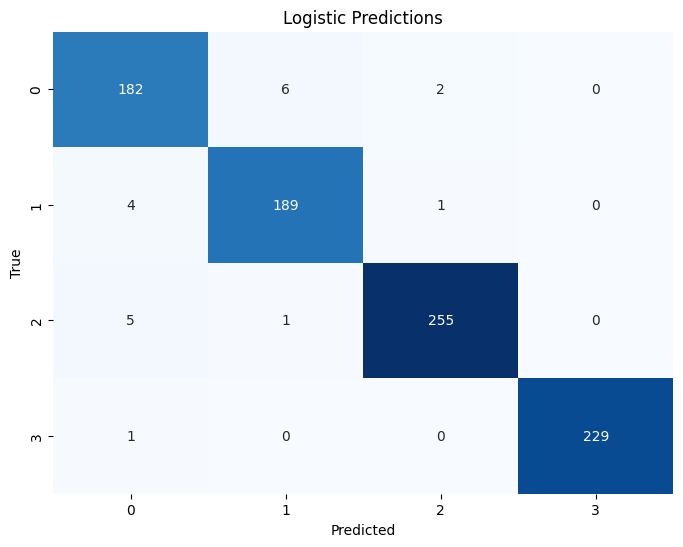

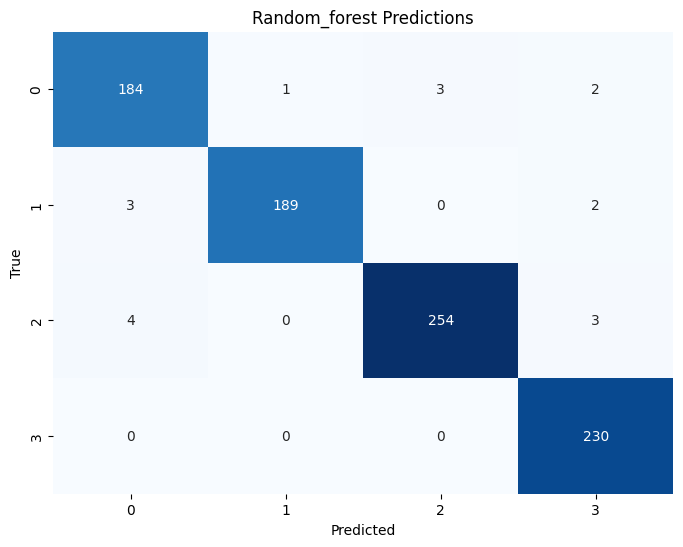

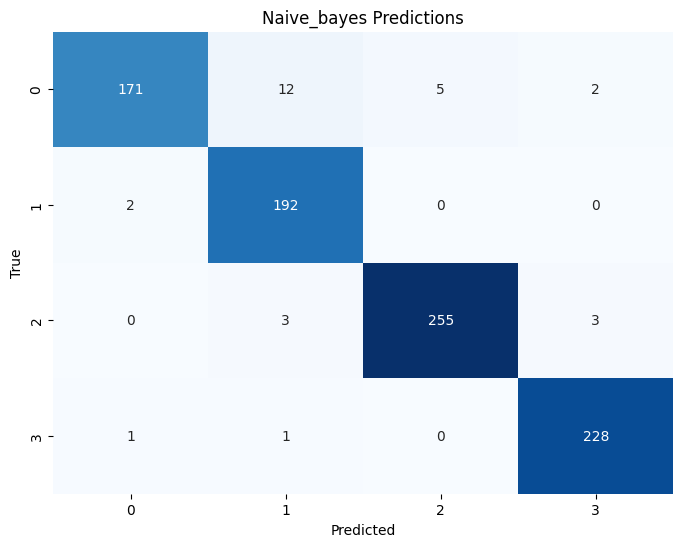

In [19]:
# Plotar matrizes de confusão
plot_confusion_matrix(df_test['categoria'], logistic_predictions, 'Logistic Predictions')
plot_confusion_matrix(df_test['categoria'], random_forest_predictions, 'Random_forest Predictions')
plot_confusion_matrix(df_test['categoria'], naive_bayes_predictions, 'Naive_bayes Predictions')

## **Parte 4**

In [20]:

from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Carregar o dataframe
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

# Limpeza inicial
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# Divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
    df,
    test_size=0.3,
    random_state=42
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:

# Tokenização
def tokenize_text(text):
    return word_tokenize(text)

df_train['tokenized_text'] = df_train['texto'].apply(tokenize_text)

# Treinar modelo Word2Vec
word2vec_model = Word2Vec(sentences=df_train['tokenized_text'], vector_size=10, window=5, min_count=1, workers=4)

# Função para criar vetor médio
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)



In [22]:
# Aplicar a função para criar vetores médios nos conjuntos de treino e teste
vector_size = 10
df_test['tokenized_text'] = df_test['texto'].apply(tokenize_text)
X_train_word2vec = np.array([get_average_vector(tokens, word2vec_model, vector_size) for tokens in df_train['tokenized_text']])
X_test_word2vec = np.array([get_average_vector(tokens, word2vec_model, vector_size) for tokens in df_test['tokenized_text']])

# Modelo de Classificação (por exemplo, Regressão Logística)
logistic_model_word2vec = LogisticRegression(max_iter=1000)
logistic_model_word2vec.fit(X_train_word2vec, df_train['categoria'])
word2vec_predictions = logistic_model_word2vec.predict(X_test_word2vec)

# Avaliação dos resultados
accuracy_word2vec = accuracy_score(df_test['categoria'], word2vec_predictions)
print(f'Precisao Word2Vec (Vetor Médio): {accuracy_word2vec:.4f}')

# Outras métricas
print('\nClassification Report Word2Vec (Vetor Médio):\n', classification_report(df_test['categoria'], word2vec_predictions))


Precisao Word2Vec (Vetor Médio): 0.7189

Classification Report Word2Vec (Vetor Médio):
               precision    recall  f1-score   support

   brinquedo       0.57      0.50      0.53       190
        game       0.70      0.67      0.68       194
       livro       0.84      0.88      0.86       261
   maquiagem       0.71      0.76      0.73       230

    accuracy                           0.72       875
   macro avg       0.70      0.70      0.70       875
weighted avg       0.71      0.72      0.72       875



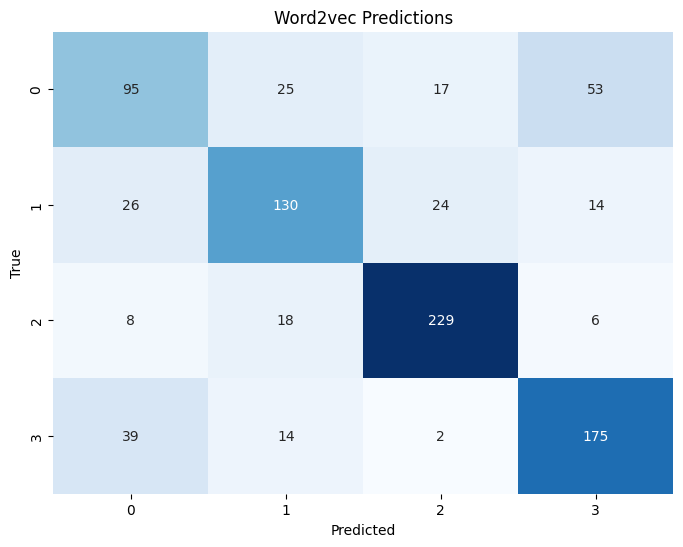

In [23]:
plot_confusion_matrix(df_test['categoria'], word2vec_predictions, 'Word2vec Predictions')